In [ ]:
import pandas as pd

# Load the dataset to examine the data
file_path = '/content/input_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26674 entries, 0 to 26673
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Unnamed: 0                           26674 non-null  int64 
 1   date                                 26674 non-null  object
 2   item_id                              26674 non-null  object
 3   batch_id                             26674 non-null  object
 4   location                             26674 non-null  object
 5   current_hop                          26674 non-null  object
 6   external_storage                     26674 non-null  object
 7   thermal_shipper_temp_reading         26674 non-null  int64 
 8   room_temp_reading                    26674 non-null  int64 
 9   room_humidity_reading                26674 non-null  int64 
 10  item_expiry_hours                    26674 non-null  int64 
 11  ultra_low_temperature_freezer_hours  2667

(   Unnamed: 0              date                 item_id  batch_id  location  \
 0           0  10/07/2020 14:00  vaccine_pfizerbiontech  batch001  Jharkand   
 1           0  10/07/2020 13:00  vaccine_pfizerbiontech  batch001  Jharkand   
 2           0  10/07/2020 12:00  vaccine_pfizerbiontech  batch001  Jharkand   
 3           0  10/07/2020 11:00  vaccine_pfizerbiontech  batch001  Jharkand   
 4           0  10/07/2020 10:00  vaccine_pfizerbiontech  batch001  Jharkand   
 
                            current_hop      external_storage  \
 0  dest_discarded_vaccine_storage_unit  vaccine_storage_unit   
 1            dest_vaccine_storage_unit  vaccine_storage_unit   
 2            dest_vaccine_storage_unit  vaccine_storage_unit   
 3            dest_vaccine_storage_unit  vaccine_storage_unit   
 4            dest_vaccine_storage_unit  vaccine_storage_unit   
 
    thermal_shipper_temp_reading  room_temp_reading  room_humidity_reading  \
 0                            14                

<Figure size 640x480 with 0 Axes>

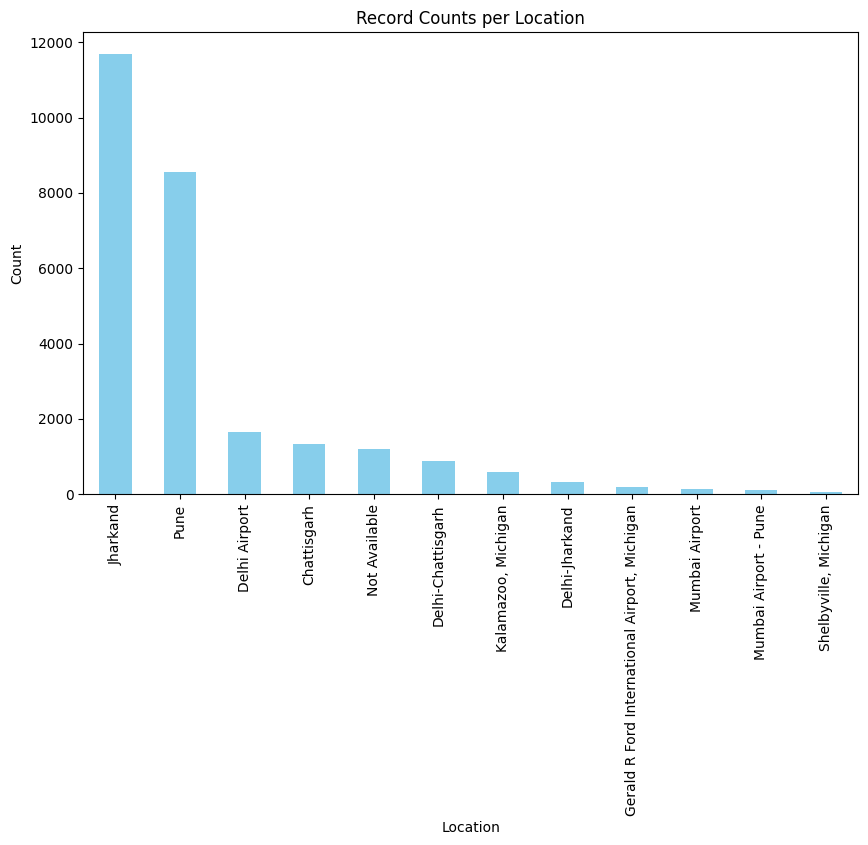

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a title for the whole visualization series
plt.suptitle("20 Different Visualizations for Vaccine Logistics Dataset", fontsize=22, y=1.02)

# 1. Bar plot of record counts per location
plt.figure(figsize=(10, 6))
data['location'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Record Counts per Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()




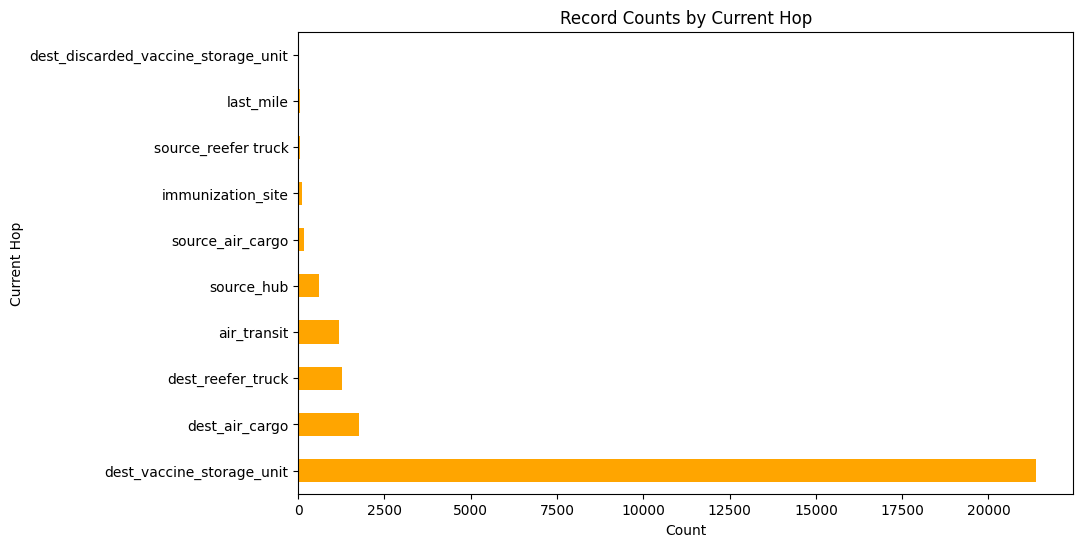

In [ ]:
# 2. Horizontal bar plot of record counts by current hop
plt.figure(figsize=(10, 6))
data['current_hop'].value_counts().plot(kind='barh', color='orange')
plt.title("Record Counts by Current Hop")
plt.xlabel("Count")
plt.ylabel("Current Hop")
plt.show()



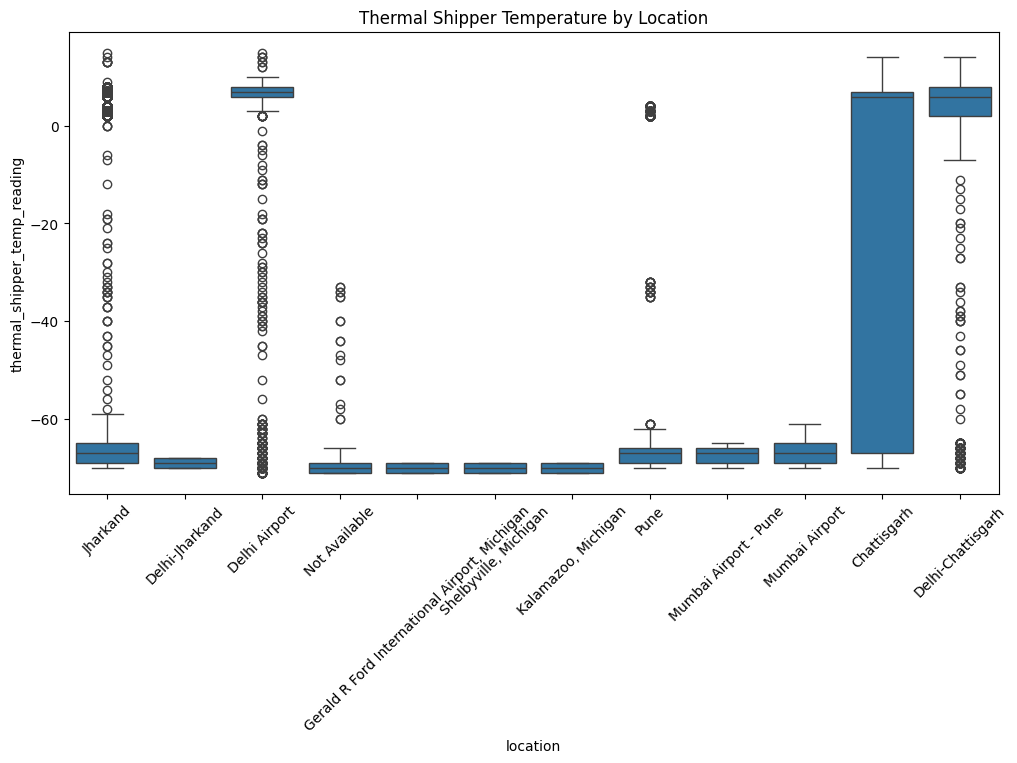

In [ ]:
# 3. Boxplot of thermal shipper temperature by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='thermal_shipper_temp_reading', data=data)
plt.title("Thermal Shipper Temperature by Location")
plt.xticks(rotation=45)
plt.show()


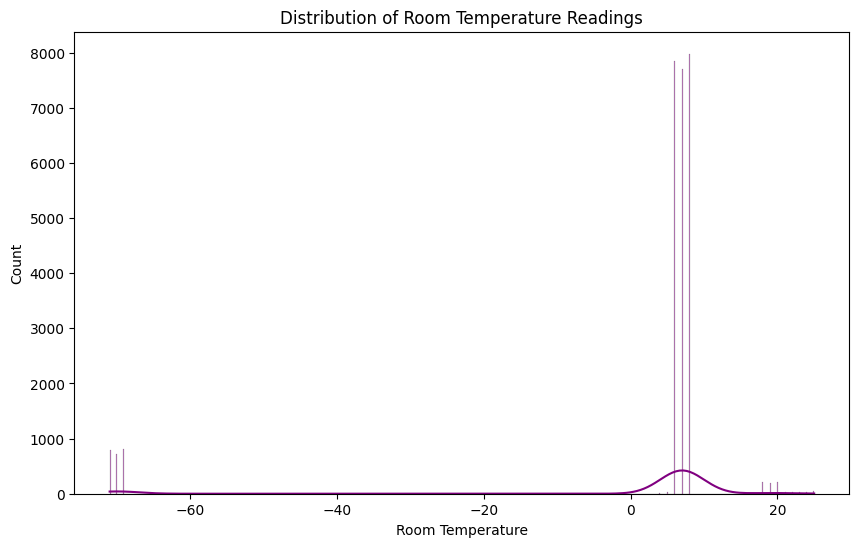

In [ ]:

# 4. Histogram of room temperature readings
plt.figure(figsize=(10, 6))
sns.histplot(data['room_temp_reading'], kde=True, color='purple')
plt.title("Distribution of Room Temperature Readings")
plt.xlabel("Room Temperature")
plt.show()



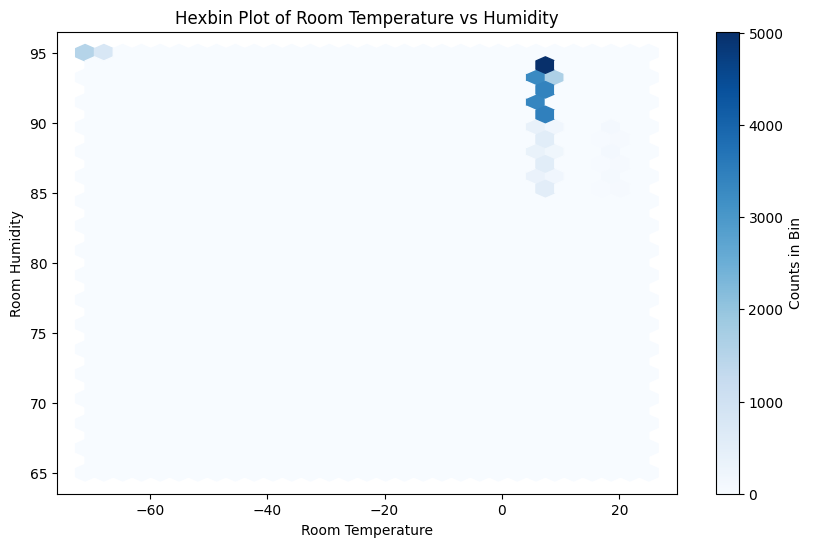

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['room_temp_reading'], data['room_humidity_reading'], gridsize=30, cmap='Blues')
plt.colorbar(label='Counts in Bin')
plt.title("Hexbin Plot of Room Temperature vs Humidity")
plt.xlabel("Room Temperature")
plt.ylabel("Room Humidity")
plt.show()


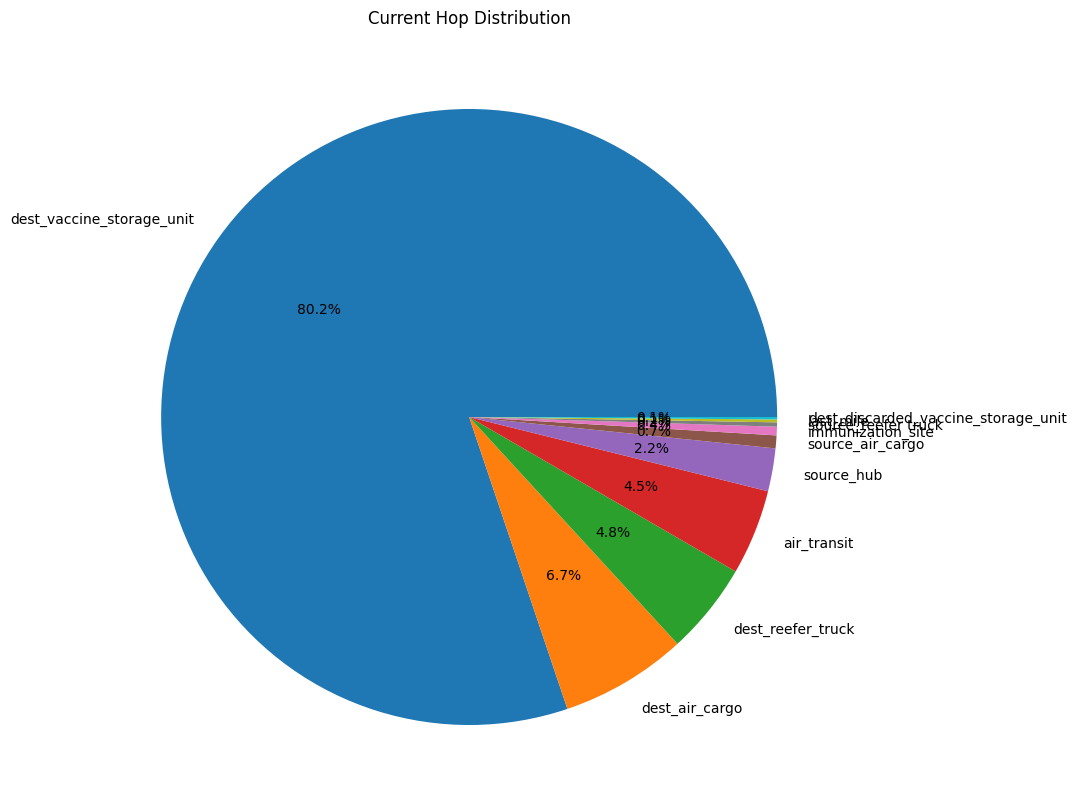

In [ ]:
# 6. Pie chart of current hop distribution
plt.figure(figsize=(10, 10))
data['current_hop'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Current Hop Distribution")
plt.ylabel("")
plt.show()



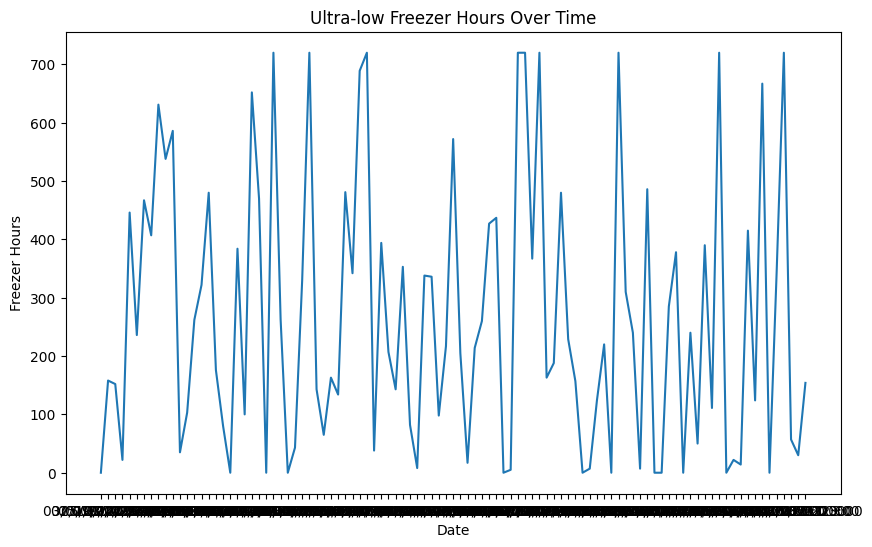

In [ ]:
# 7. Line plot of ultra-low freezer hours over time (sampled data for speed)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='ultra_low_temperature_freezer_hours', data=data.sample(100))
plt.title("Ultra-low Freezer Hours Over Time")
plt.xlabel("Date")
plt.ylabel("Freezer Hours")
plt.show()


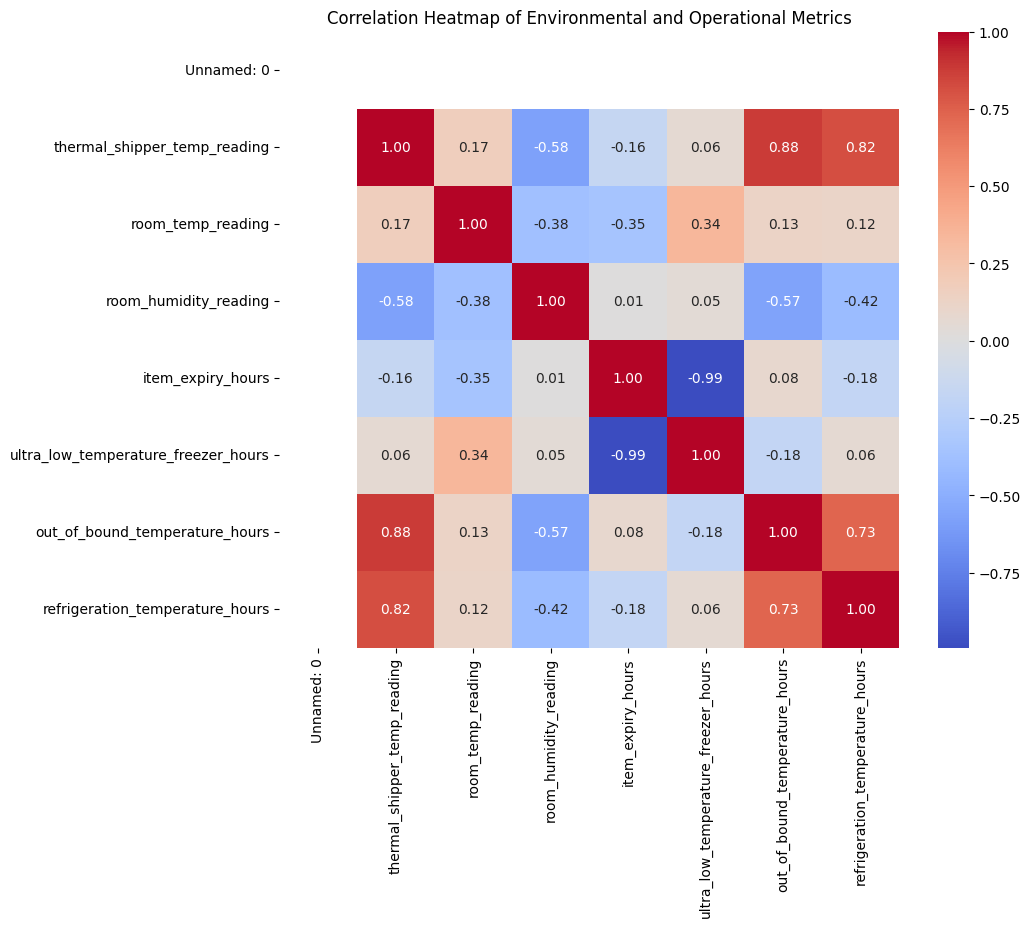

In [ ]:
# Selecting only numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Environmental and Operational Metrics")
plt.show()

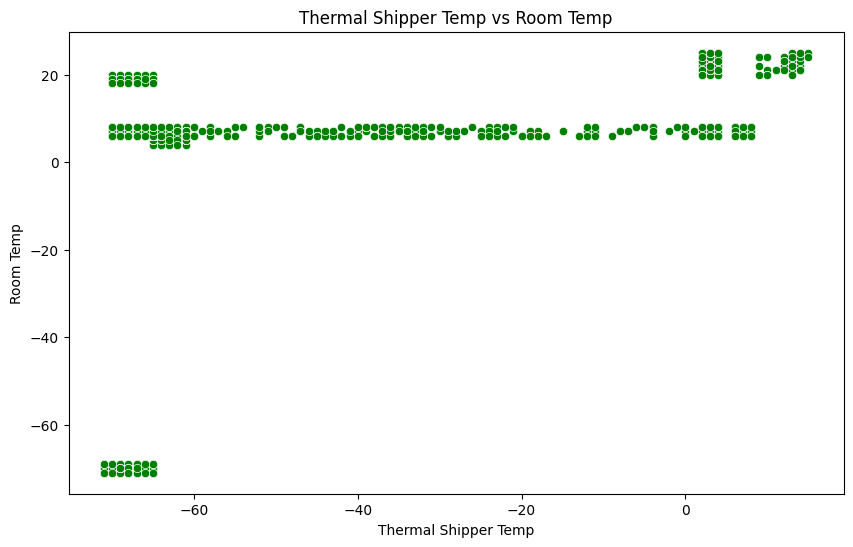

In [ ]:

# 9. Scatter plot of thermal shipper temp vs room temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thermal_shipper_temp_reading', y='room_temp_reading', data=data, color='green')
plt.title("Thermal Shipper Temp vs Room Temp")
plt.xlabel("Thermal Shipper Temp")
plt.ylabel("Room Temp")
plt.show()


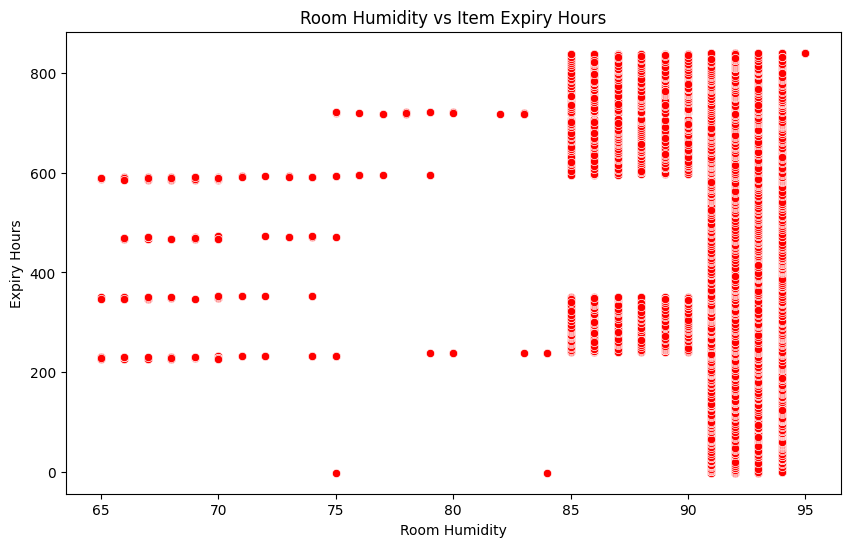

In [ ]:

# 10. Scatter plot of room humidity vs expiry hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_humidity_reading', y='item_expiry_hours', data=data, color='red')
plt.title("Room Humidity vs Item Expiry Hours")
plt.xlabel("Room Humidity")
plt.ylabel("Expiry Hours")
plt.show()


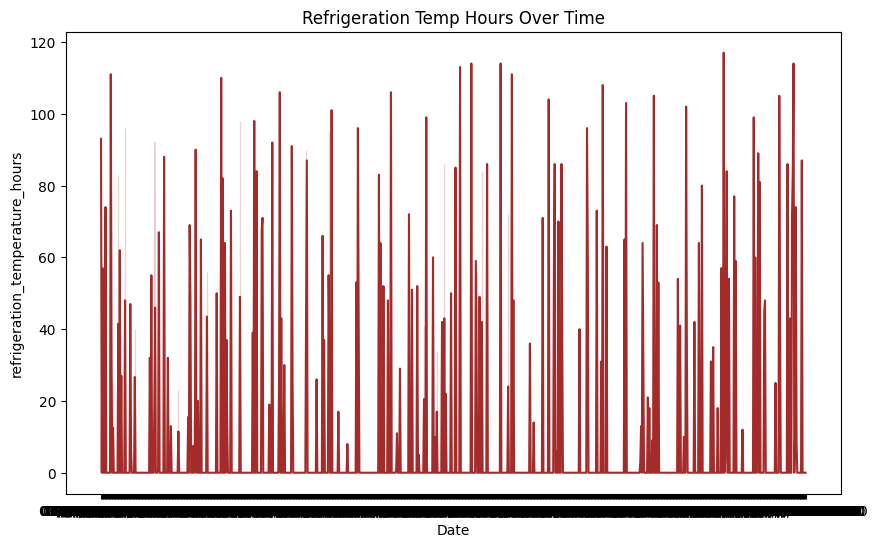

In [ ]:

# 11. Plot of refrigeration temperature hours over time (sampled data for speed)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='refrigeration_temperature_hours', data=data.sample(1000), color='brown')
plt.title("Refrigeration Temp Hours Over Time")
plt.xlabel("Date")
plt.show()


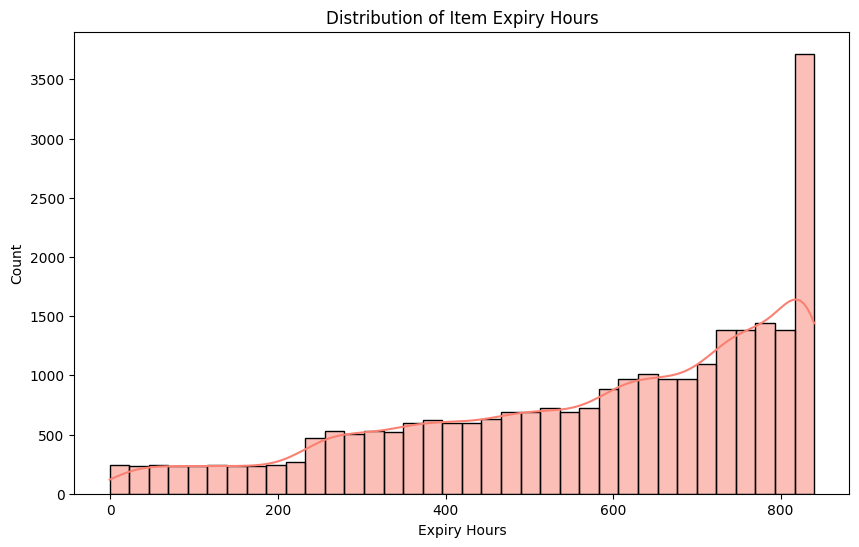

In [ ]:

# 12. Histogram of expiry hours
plt.figure(figsize=(10, 6))
sns.histplot(data['item_expiry_hours'], kde=True, color='salmon')
plt.title("Distribution of Item Expiry Hours")
plt.xlabel("Expiry Hours")
plt.show()


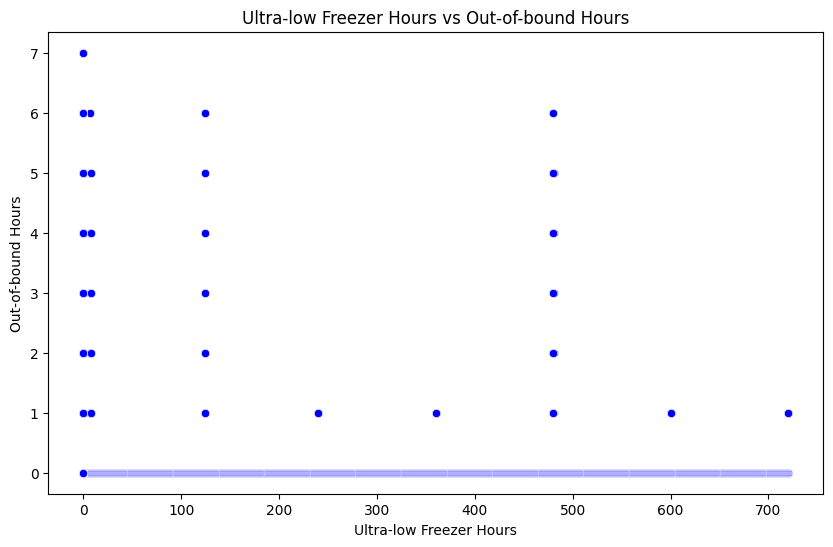

In [ ]:

# 13. Scatter plot of ultra-low freezer hours vs out-of-bound hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ultra_low_temperature_freezer_hours', y='out_of_bound_temperature_hours', data=data, color='blue')
plt.title("Ultra-low Freezer Hours vs Out-of-bound Hours")
plt.xlabel("Ultra-low Freezer Hours")
plt.ylabel("Out-of-bound Hours")
plt.show()


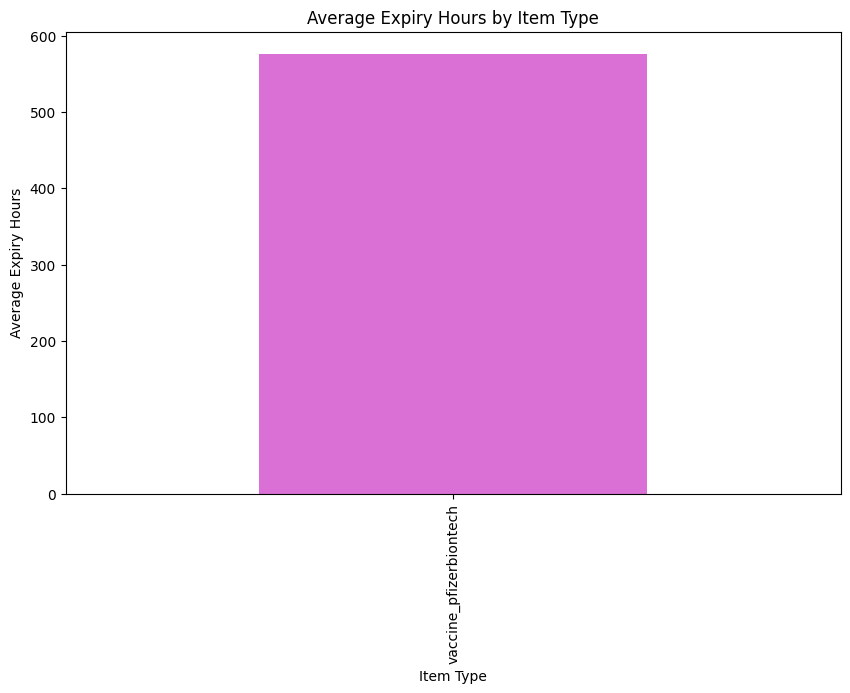

In [ ]:

# 14. Bar plot of expiry hours by item type
plt.figure(figsize=(10, 6))
data.groupby('item_id')['item_expiry_hours'].mean().plot(kind='bar', color='orchid')
plt.title("Average Expiry Hours by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Average Expiry Hours")
plt.show()


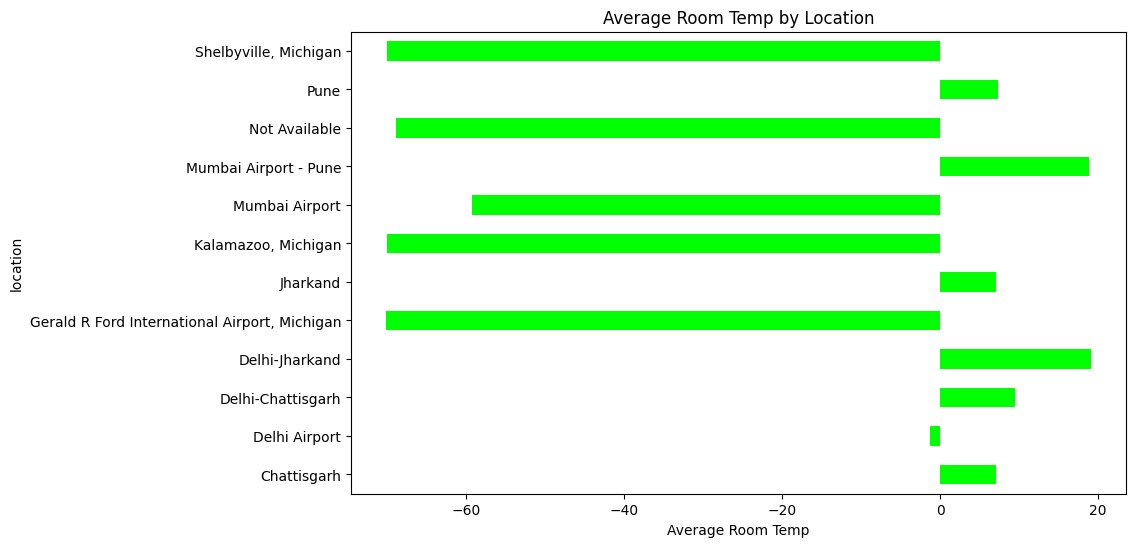

In [ ]:

# 15. Horizontal bar plot of average room temp by location
plt.figure(figsize=(10, 6))
data.groupby('location')['room_temp_reading'].mean().plot(kind='barh', color='lime')
plt.title("Average Room Temp by Location")
plt.xlabel("Average Room Temp")
plt.show()


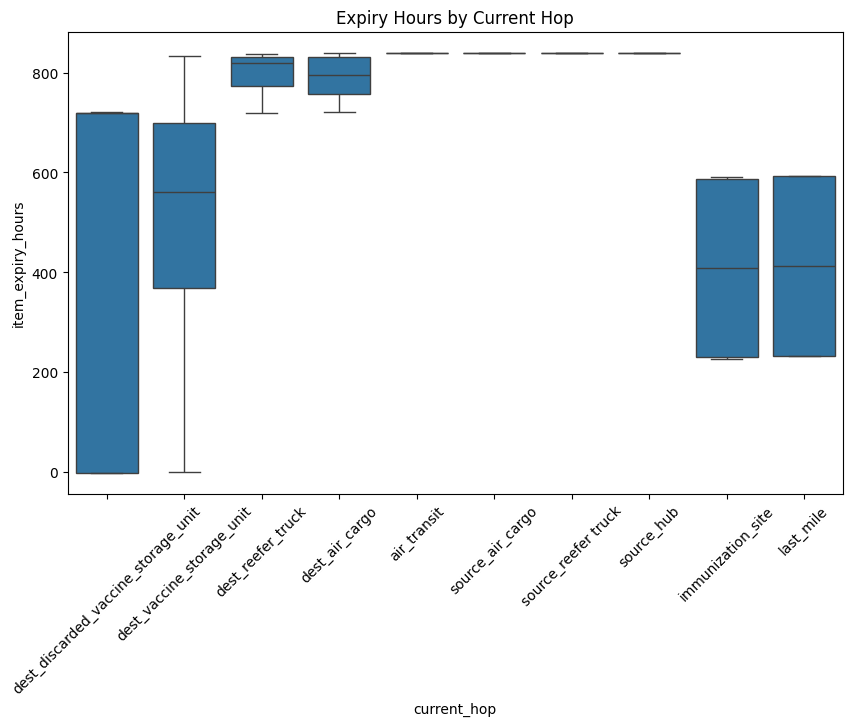

In [ ]:

# 16. Boxplot of expiry hours by current hop
plt.figure(figsize=(10, 6))
sns.boxplot(x='current_hop', y='item_expiry_hours', data=data)
plt.title("Expiry Hours by Current Hop")
plt.xticks(rotation=45)
plt.show()


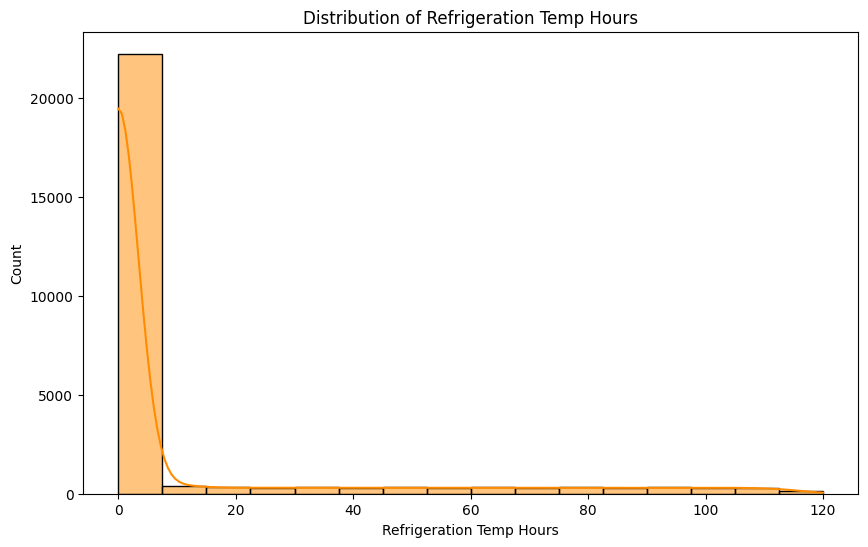

In [ ]:

# 17. Histogram of refrigeration temperature hours
plt.figure(figsize=(10, 6))
sns.histplot(data['refrigeration_temperature_hours'], kde=True, color='darkorange')
plt.title("Distribution of Refrigeration Temp Hours")
plt.xlabel("Refrigeration Temp Hours")
plt.show()

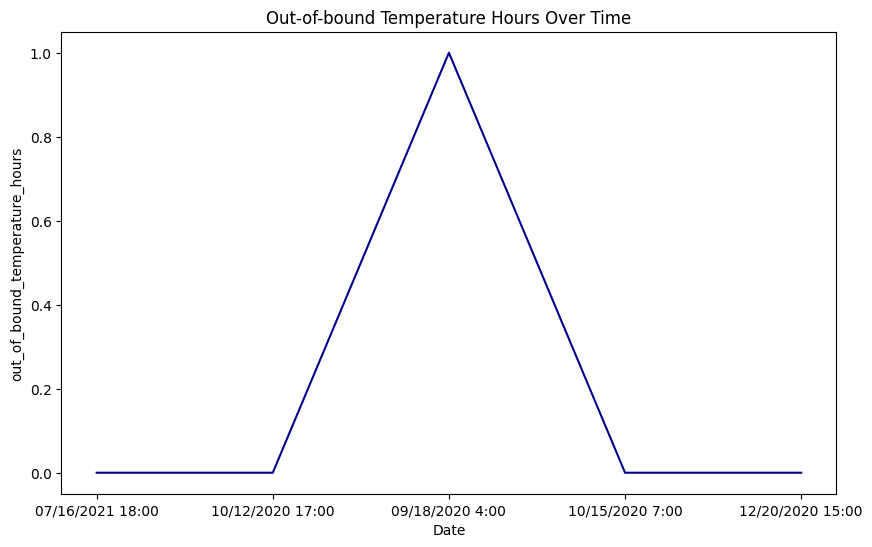

In [ ]:
# 18. Line plot of out-of-bound hours over time (sampled)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='out_of_bound_temperature_hours', data=data.sample(5), color='darkblue')
plt.title("Out-of-bound Temperature Hours Over Time")
plt.xlabel("Date")
plt.show()

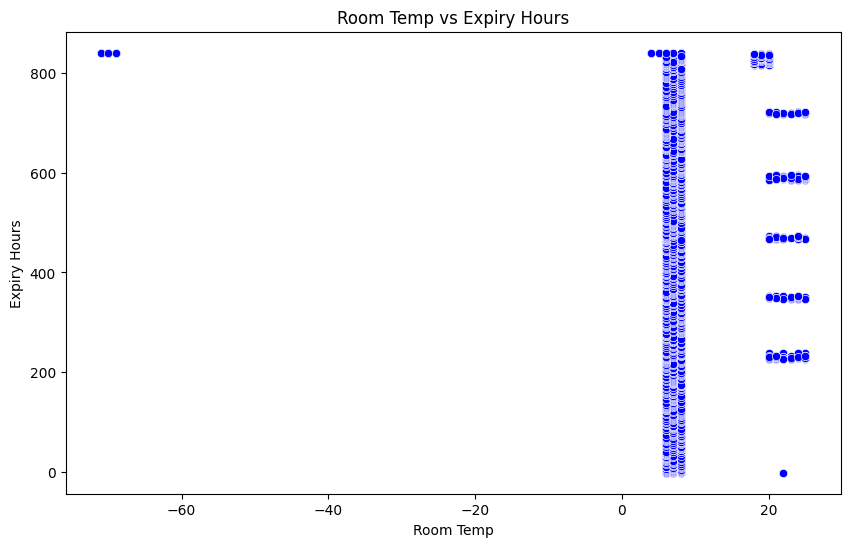

In [ ]:
# 19. Scatter plot of room temperature vs expiry hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_temp_reading', y='item_expiry_hours', data=data, color='blue')
plt.title("Room Temp vs Expiry Hours")
plt.xlabel("Room Temp")
plt.ylabel("Expiry Hours")
plt.show()

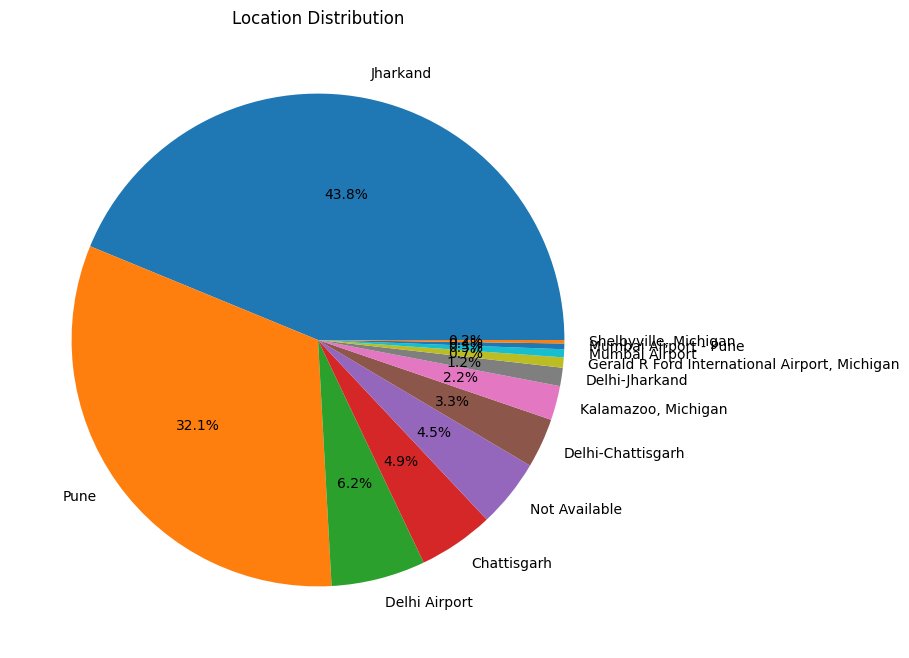

In [ ]:
# 20. Pie chart of location distribution
plt.figure(figsize=(8, 8))
data['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Location Distribution")
plt.ylabel("")
plt.show()